# Singapore Resale Flat Price Prediction

# 1. Import Libraries

In [24]:
#[Data Transformation]
import pandas as pd
import numpy as np

#[Data Visualization]
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

#[Model]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#[Metrics]
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#[Algorithm]
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#[Functions]
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# 2. Load Datasets

In [4]:
# Add all datasets from 1990 to till date
df_prices1990 = pd.read_csv("Data/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_prices2000 = pd.read_csv("Data/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_prices2012 = pd.read_csv("Data/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_prices2015 = pd.read_csv("Data/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_prices2017 = pd.read_csv("Data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [5]:
df_prices1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [6]:
df_prices2000.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [7]:
df_prices2012.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [8]:
df_prices2015.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
df_prices2017.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


**Dataset:**
| Feature | Description |
| :--- | :--- |
| __month__ | Data collection |
| __town__ | Place of the building |
| __flat_type__ | Number of rooms |
| __block__ | Building number |
| __street_name__ | Address of the building |
| __storey_range__ | Available floors |
| __floor_area_sqm__ | Floor area including recess area, roof_terrace, etc. |
| __flat_model__ | Type of flat |
| __lease_commence_date__ | Starting period of lease (year) |
| __remaining_lease__ | The number of years, months and days left before the lease expires |
| __resale_price__ | resale price is agreed between buyers and sellers are dependent on many factors |

# 3. Data Preparation

In [10]:
# Split the year from "remaining_lease"
df_prices2017["remaining_lease"] = df_prices2017["remaining_lease"].str.split(" ").str[0].astype("int64")
df_prices2017.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
178849,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,62,855000.0
178850,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62,900000.0
178851,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,62,805000.0
178852,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,62,998000.0
178853,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,62,1200000.0


In [11]:
prices = pd.concat([df_prices1990, df_prices2000, df_prices2012, df_prices2015, df_prices2017], axis=0, ignore_index=True, sort=False)
prices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
925052,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62.0
925053,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62.0
925054,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62.0
925055,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.0


In [12]:
prices.shape

(925057, 11)

In [13]:
prices.describe()

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
count,925057.000000,925057.000000,9.250570e+05,216007.000000
mean,95.691869,1988.253790,3.201086e+05,74.122672
std,25.828512,10.639862,1.698594e+05,13.460523
min,28.000000,1966.000000,5.000000e+03,41.000000
25%,73.000000,1981.000000,1.930000e+05,63.000000
50%,93.000000,1986.000000,2.960000e+05,74.000000
75%,113.000000,1996.000000,4.160000e+05,85.000000
max,307.000000,2022.000000,1.568888e+06,97.000000


In [14]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925057 entries, 0 to 925056
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                925057 non-null  object 
 1   town                 925057 non-null  object 
 2   flat_type            925057 non-null  object 
 3   block                925057 non-null  object 
 4   street_name          925057 non-null  object 
 5   storey_range         925057 non-null  object 
 6   floor_area_sqm       925057 non-null  float64
 7   flat_model           925057 non-null  object 
 8   lease_commence_date  925057 non-null  int64  
 9   resale_price         925057 non-null  float64
 10  remaining_lease      216007 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 77.6+ MB


In [15]:
prices.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [16]:
prices.duplicated().sum()

1961

- The dataset consists of **925057** records and **10** features.
- The datatypes seen are **object, float64, int64**.
- `remaining_lease` has lots of NAs. They are only available after 2015 sales onwards. 
- Other features doesn't have any missing values.
- Categorical variables are *month, town, flat_type, storey_range, flat_model*.
- Continous variables are *floor_area_sqm, lease_commence_date, resale_price*.
- The dataset contains **1961** duplicates.

In [17]:
prices.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [18]:
df1 = prices.copy()

In [19]:
df1.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
925052,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62.0
925053,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62.0
925054,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62.0
925055,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.0
925056,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,62.0


## Fill Missing Values

In [20]:
# Split "month" feature to "year" and "month" features
df1[["year", "month"]] = df1["month"].str.split("-", expand=True)

# Convert to numeric
df1["year"] = pd.to_numeric(df1["year"])
df1["month"] = pd.to_numeric(df1["month"])

df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990


In [21]:
# Calculating "remaining_lease" for NaN values
# HDB flats in Singapore typically have a lease term of 99 years.
df1['remaining_lease'].fillna(99 - (df1['year'] - df1['lease_commence_date']), inplace=True)

# Verify the results
print(df1[['lease_commence_date', 'year', 'remaining_lease']])

        lease_commence_date  year  remaining_lease
0                      1977  1990             86.0
1                      1977  1990             86.0
2                      1977  1990             86.0
3                      1977  1990             86.0
4                      1976  1990             85.0
...                     ...   ...              ...
925052                 1987  2024             62.0
925053                 1988  2024             62.0
925054                 1988  2024             62.0
925055                 1987  2024             62.0
925056                 1987  2024             62.0

[925057 rows x 3 columns]


In [22]:
# Save data to visualize
# df1.to_csv("Data/pre_processed_data.csv", index= False)

## 3.2 Encoding

In [33]:
df1["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [34]:
df1["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [35]:
df1.replace("MULTI-GENERATION", "MULTI GENERATION", inplace=True)

In [36]:
df1["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [37]:
df1["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [38]:
df1["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [39]:
flat_model_replaces = {"NEW GENERATION": "New Generation", "MULTI GENERATION": "Multi Generation",
                       "IMPROVED":  "Improved", "STANDARD": "Standard",
                       "SIMPLIFIED": "Simplified", "MODEL A-MAISONETTE": "Model A-Maisonette",
                       "APARTMENT": "Apartment", "MAISONETTE": "Maisonette",
                       "TERRACE": "Terrace", "2-ROOM": "2-room", "IMPROVED-MAISONETTE": "Improved-Maisonette",
                       "PREMIUM APARTMENT": "Premium Apartment", "MODEL A": "Model A"}

df1 = df1.replace({'flat_model': flat_model_replaces})

In [40]:
df1["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [41]:
# Map Method
flat_type_dict = {'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM':4, 'EXECUTIVE': 5, 'MULTI GENERATION': 6}
df1["flat_type"] = df1["flat_type"].map(flat_type_dict)

town_dict = {'ANG MO KIO': 0, 'BISHAN': 1, 'BUKIT BATOK': 2, 'BUKIT MERAH': 3,
       'BUKIT TIMAH': 4, 'CENTRAL AREA': 5, 'CHOA CHU KANG': 6, 'CLEMENTI': 7,
       'GEYLANG': 8, 'HOUGANG': 9, 'JURONG EAST': 10, 'JURONG WEST': 11,
       'KALLANG/WHAMPOA': 12, 'MARINE PARADE': 13, 'QUEENSTOWN': 14, 'SENGKANG': 15,
       'SERANGOON': 16, 'TAMPINES': 17, 'TOA PAYOH': 18, 'WOODLANDS': 19, 'YISHUN': 20,
       'LIM CHU KANG': 21, 'SEMBAWANG': 22, 'BUKIT PANJANG': 23, 'PASIR RIS': 24,
       'PUNGGOL': 25,  'BEDOK': 26}
df1["town"] = df1["town"].map(town_dict)

storey_range_dict = {'10 TO 12': 0, '04 TO 06': 1, '07 TO 09': 2, '01 TO 03': 3, '13 TO 15': 4,
       '19 TO 21': 5, '16 TO 18': 6, '25 TO 27': 7, '22 TO 24': 8, '28 TO 30': 9,
       '31 TO 33': 10, '40 TO 42': 11, '37 TO 39': 12, '34 TO 36': 13, '06 TO 10': 14,
       '01 TO 05': 15, '11 TO 15': 16, '16 TO 20': 17, '21 TO 25': 18, '26 TO 30': 19,
       '36 TO 40': 20, '31 TO 35': 21, '46 TO 48': 22, '43 TO 45': 23, '49 TO 51': 24}
df1["storey_range"] = df1["storey_range"].map(storey_range_dict)

flat_model_dict = {'Improved': 0, 'New Generation': 1, 'Model A': 2, 'Standard': 3, 'Simplified': 4,
       'Model A-Maisonette': 5, 'Apartment': 6, 'Maisonette': 7, 'Terrace': 8,
       '2-room': 9, 'Improved-Maisonette': 10, 'Multi Generation': 11,
       'Premium Apartment': 12, 'Adjoined flat': 13, 'Premium Maisonette': 14,
       'Model A2': 15, 'DBSS': 16, 'Type S1': 17, 'Type S2':18, 'Premium Apartment Loft': 19,
       '3Gen': 20}
df1["flat_model"] = df1["flat_model"].map(flat_model_dict)

In [42]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,ANG MO KIO AVE 1,0,31.0,0,1977,9000.0,86.0,1990
1,1,0,0,309,ANG MO KIO AVE 1,1,31.0,0,1977,6000.0,86.0,1990
2,1,0,0,309,ANG MO KIO AVE 1,0,31.0,0,1977,8000.0,86.0,1990
3,1,0,0,309,ANG MO KIO AVE 1,2,31.0,0,1977,6000.0,86.0,1990
4,1,0,2,216,ANG MO KIO AVE 1,1,73.0,1,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
925052,3,20,5,824,YISHUN ST 81,2,142.0,6,1987,855000.0,62.0,2024
925053,4,20,5,826,YISHUN ST 81,1,146.0,7,1988,900000.0,62.0,2024
925054,4,20,5,836,YISHUN ST 81,1,142.0,6,1988,805000.0,62.0,2024
925055,2,20,6,666,YISHUN AVE 4,1,164.0,11,1987,998000.0,62.0,2024


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925057 entries, 0 to 925056
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                925057 non-null  int64  
 1   town                 925057 non-null  int64  
 2   flat_type            925057 non-null  int64  
 3   block                925057 non-null  object 
 4   street_name          925057 non-null  object 
 5   storey_range         925057 non-null  int64  
 6   floor_area_sqm       925057 non-null  float64
 7   flat_model           925057 non-null  int64  
 8   lease_commence_date  925057 non-null  int64  
 9   resale_price         925057 non-null  float64
 10  remaining_lease      925057 non-null  float64
 11  year                 925057 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 84.7+ MB


All the categories are encoded for model.

## 3.3 Dropping Duplicates 

In [45]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

## 3.4 Skewness

In [46]:
# Get continuous features
continuous_features = ["floor_area_sqm", "resale_price"]
continuous_features

['floor_area_sqm', 'resale_price']

In [47]:
# Measure skewness in the numerical features
numerical_features = df1[continuous_features]  
skewness = numerical_features.skew()
print(skewness)

floor_area_sqm    0.366015
resale_price      0.938662
dtype: float64


Moderate skewness is observed in all features.

## 3.4 Outliers Treatment

In [48]:
def count_outliers(df, continuous_features):
    Q1 = df[continuous_features].quantile(0.25)
    Q3 = df[continuous_features].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()
    return outliers_count_specified

In [49]:
count_outliers(df1, continuous_features)

floor_area_sqm     2402
resale_price      18898
dtype: int64

In [50]:
def remove_outliers(df, continuous_features):
    """Interquartile Range (IQR) method based outlier removal"""
    for column in continuous_features:
        percentile25 = df[column].quantile(0.25) # Q1
        percentile75 = df[column].quantile(0.75) # Q3
        iqr = percentile75-percentile25
        upper_lt = percentile75 + 1.5*iqr
        lower_lt = percentile25 - 1.5*iqr
        df[column] = df[column].clip(lower_lt, upper_lt)
    return df

In [51]:
df2 = remove_outliers(df1, continuous_features)
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,ANG MO KIO AVE 1,0,31.0,0,1977,9000.0,86.0,1990
1,1,0,0,309,ANG MO KIO AVE 1,1,31.0,0,1977,6000.0,86.0,1990
2,1,0,0,309,ANG MO KIO AVE 1,0,31.0,0,1977,8000.0,86.0,1990
3,1,0,0,309,ANG MO KIO AVE 1,2,31.0,0,1977,6000.0,86.0,1990
4,1,0,2,216,ANG MO KIO AVE 1,1,73.0,1,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
925052,3,20,5,824,YISHUN ST 81,2,142.0,6,1987,751750.0,62.0,2024
925053,4,20,5,826,YISHUN ST 81,1,146.0,7,1988,751750.0,62.0,2024
925054,4,20,5,836,YISHUN ST 81,1,142.0,6,1988,751750.0,62.0,2024
925055,2,20,6,666,YISHUN AVE 4,1,164.0,11,1987,751750.0,62.0,2024


In [52]:
count_outliers(df2, continuous_features)

floor_area_sqm    0
resale_price      0
dtype: int64

## 3.4 Feature Scaling
Scaling is required for linear regression.

In [53]:
scaler = StandardScaler()

# Fit continuous columns and transform
scaled_columns = ["floor_area_sqm", "resale_price"]

scaler.fit(df2[scaled_columns])

scaled_df = pd.DataFrame(scaler.transform(df2[scaled_columns]), index=df2.index, columns=scaled_columns)

df3 = df2.copy()
df3 = df3.drop(["floor_area_sqm", "resale_price"], axis=1)
scaled_df = pd.concat([df3, scaled_df], axis= 1)

scaled_df


,month,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,year,floor_area_sqm,resale_price
0,1,0,0,309,ANG MO KIO AVE 1,0,0,1977,86.0,1990,-2.514316,-1.901856
1,1,0,0,309,ANG MO KIO AVE 1,1,0,1977,86.0,1990,-2.514316,-1.920326
2,1,0,0,309,ANG MO KIO AVE 1,0,0,1977,86.0,1990,-2.514316,-1.908013
3,1,0,0,309,ANG MO KIO AVE 1,2,0,1977,86.0,1990,-2.514316,-1.920326
4,1,0,2,216,ANG MO KIO AVE 1,1,1,1976,85.0,1990,-0.881856,-1.666674
...,...,...,...,...,...,...,...,...,...,...,...,...
925052,3,20,5,824,YISHUN ST 81,2,6,1987,62.0,2024,1.800043,2.670967
925053,4,20,5,826,YISHUN ST 81,1,7,1988,62.0,2024,1.955516,2.670967
925054,4,20,5,836,YISHUN ST 81,1,6,1988,62.0,2024,1.800043,2.670967
925055,2,20,6,666,YISHUN AVE 4,1,11,1987,62.0,2024,2.655142,2.670967


## 3.1 Feature Selection
Irrelevant features removal

In [54]:
df4 = scaled_df.drop(["block", "street_name"], axis= 1)
df4.head()

,month,town,flat_type,storey_range,flat_model,lease_commence_date,remaining_lease,year,floor_area_sqm,resale_price
0,1,0,0,0,0,1977,86.0,1990,-2.514316,-1.901856
1,1,0,0,1,0,1977,86.0,1990,-2.514316,-1.920326
2,1,0,0,0,0,1977,86.0,1990,-2.514316,-1.908013
3,1,0,0,2,0,1977,86.0,1990,-2.514316,-1.920326
4,1,0,2,1,1,1976,85.0,1990,-0.881856,-1.666674


## Save the Data

In [59]:
# Save the data
df4.to_csv('Data/processed_data1.csv', index=False)

In [90]:
df4

,town,flat_type,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqm,resale_price
0,0,0,0,0,1977,86.0,-2.514316,-1.901856
1,0,0,1,0,1977,86.0,-2.514316,-1.920326
2,0,0,0,0,1977,86.0,-2.514316,-1.908013
3,0,0,2,0,1977,86.0,-2.514316,-1.920326
4,0,2,1,1,1976,85.0,-0.881856,-1.666674
...,...,...,...,...,...,...,...,...
925052,20,5,2,6,1987,62.0,1.800043,2.670967
925053,20,5,1,7,1988,62.0,1.955516,2.670967
925054,20,5,1,6,1988,62.0,1.800043,2.670967
925055,20,6,1,11,1987,62.0,2.655142,2.670967


# 4. EDA (Exploratory Data Analysis)

In [23]:
EDA_DF = pd.read_csv("Data/pre_processed_data.csv")
EDA_DF

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
925052,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62.0,2024
925053,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62.0,2024
925054,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62.0,2024
925055,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.0,2024


## Popular Resale Flat Towns

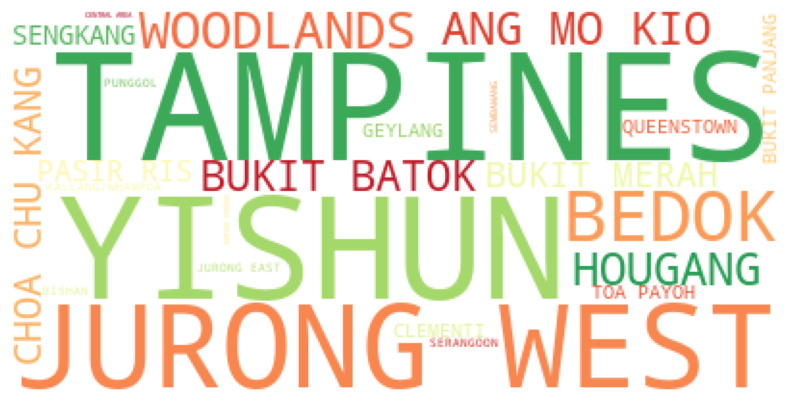

{'TAMPINES': 79825,
 'YISHUN': 69947,
 'JURONG WEST': 66558,
 'BEDOK': 66555,
 'WOODLANDS': 65394,
 'ANG MO KIO': 51999,
 'HOUGANG': 50634,
 'BUKIT BATOK': 44278,
 'CHOA CHU KANG': 38208,
 'BUKIT MERAH': 34289,
 'PASIR RIS': 33163,
 'SENGKANG': 32337,
 'TOA PAYOH': 31472,
 'QUEENSTOWN': 28719,
 'GEYLANG': 28123,
 'CLEMENTI': 27993,
 'BUKIT PANJANG': 27633,
 'KALLANG/WHAMPOA': 27112,
 'JURONG EAST': 24738,
 'SERANGOON': 22797,
 'BISHAN': 21234,
 'PUNGGOL': 20516,
 'SEMBAWANG': 13794,
 'MARINE PARADE': 8024,
 'CENTRAL AREA': 7137,
 'BUKIT TIMAH': 2514,
 'LIM CHU KANG': 64}

In [25]:
# Most popular resale flat towns using wordcloud
data = EDA_DF['town'].value_counts().to_dict()
wc = WordCloud(colormap='RdYlGn', background_color='white',).generate_from_frequencies(data)
plt.figure( figsize=(15,5))
plt.tight_layout(pad=0)
plt.imshow(wc)
plt.axis('off')
plt.show()
data

## By Flat Type

<AxesSubplot:xlabel='floor_area_sqm', ylabel='flat_type'>

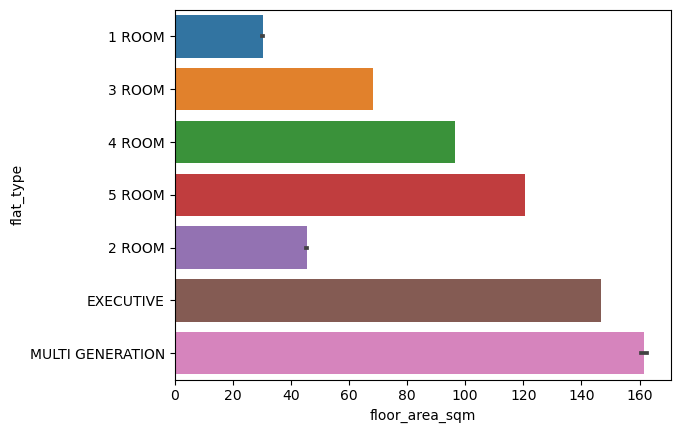

In [28]:
# Flat_type vs floor_area_sqm
EDA_DF.replace("MULTI-GENERATION", "MULTI GENERATION", inplace=True)
sns.barplot(data= EDA_DF, x= "floor_area_sqm", y= "flat_type")

<AxesSubplot:xlabel='resale_price', ylabel='flat_type'>

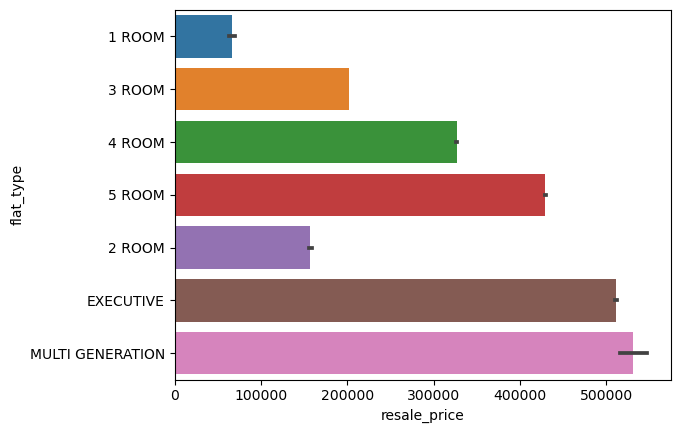

In [31]:
sns.barplot(data= EDA_DF, x= "resale_price", y= "flat_type")

## By Flat Model

<AxesSubplot:xlabel='floor_area_sqm', ylabel='flat_model'>

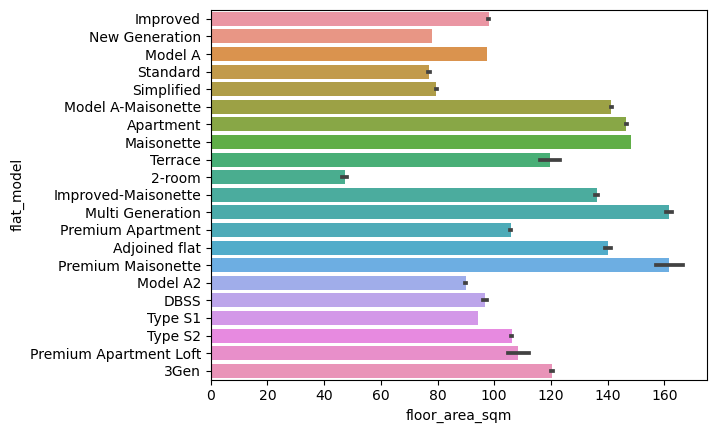

In [29]:
# Flat_model vs floor_area_sqm
flat_model_replaces = {"NEW GENERATION": "New Generation", "MULTI GENERATION": "Multi Generation",
                       "IMPROVED":  "Improved", "STANDARD": "Standard",
                       "SIMPLIFIED": "Simplified", "MODEL A-MAISONETTE": "Model A-Maisonette",
                       "APARTMENT": "Apartment", "MAISONETTE": "Maisonette",
                       "TERRACE": "Terrace", "2-ROOM": "2-room", "IMPROVED-MAISONETTE": "Improved-Maisonette",
                       "PREMIUM APARTMENT": "Premium Apartment", "MODEL A": "Model A"}

EDA_DF = EDA_DF.replace({'flat_model': flat_model_replaces})
sns.barplot(data= EDA_DF, x= "floor_area_sqm", y= "flat_model")

<AxesSubplot:xlabel='resale_price', ylabel='flat_model'>

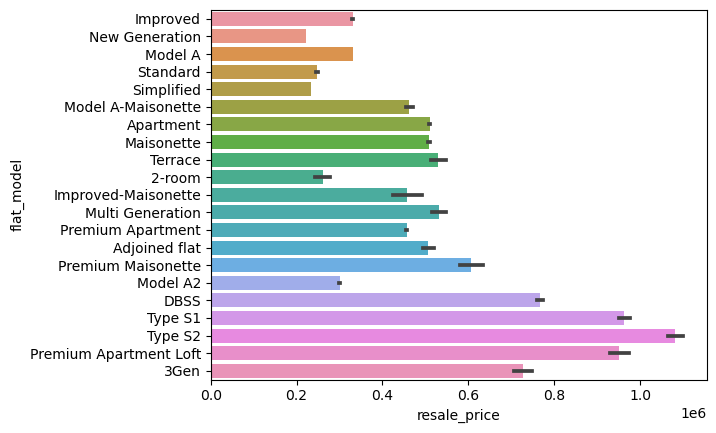

In [32]:
sns.barplot(data= EDA_DF, x= "resale_price", y= "flat_model")

In [33]:
EDA_DF.to_csv('Data/pre_processed_data2.csv', index=False)

## Multi-collinearity
A simple way to detect collinearity between variables with correlation matrix.

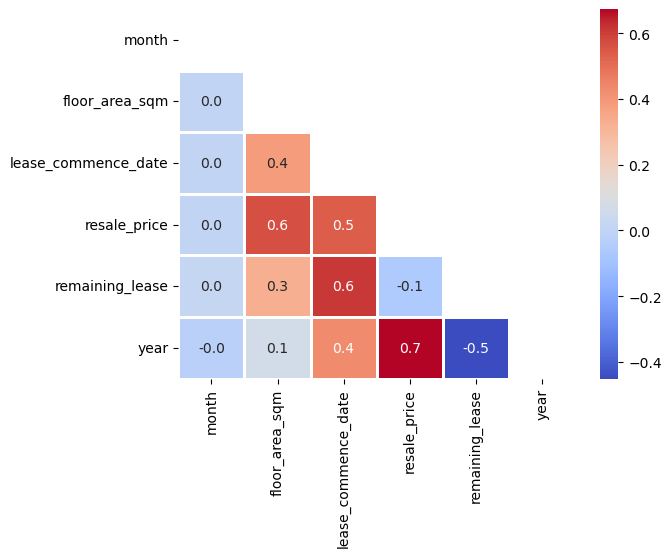

In [34]:
corrMatrix = EDA_DF.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=True)
plt.show()

# 5. Model

## Best Regressor

In [57]:
# Find the best prediction model with MSE, RMSE, R^2, MAE.
 
def evaluate_Reg_model(df: pd.DataFrame, algorithms: list):
    """
    Evaluate various regression models based on MSE, RMSE, R^2, MAE.

    Args:
        df: The input dataframe containing features and target variables
        algorithm: A list of regression model classes.

    Returns:
        pd.DataFrame: A df summarizing the performance metrics. 
    """

    results = []
    for algorithm in algorithms:
        x = df.drop("resale_price", axis= 1)
        y = df["resale_price"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        metrics = {"Model": algorithm.__name__,
                   "MSE": mse,
                   "RMSE": rmse,
                   "R^2": r2,
                   "MAE": mae}
        results.append(metrics)

    # Convert dictionary to dataframe
    df = pd.DataFrame(results).round(4)
    
    return df

In [58]:
# Evaluate regression models
reg_algorithms = [ExtraTreesRegressor, RandomForestRegressor, LinearRegression]

df_reg_performance = evaluate_Reg_model(df4, reg_algorithms)
df_reg_performance

,Model,MSE,RMSE,R^2,MAE
0,ExtraTreesRegressor,0.0231,0.1518,0.9769,0.1050
1,RandomForestRegressor,0.0208,0.1442,0.9792,0.0993
2,LinearRegression,0.2256,0.4750,0.7741,0.3637


## 5.1 Random Forest Regressor

In [62]:
# Train the model and predict "resale_price"
rf_model = df4
x = rf_model.drop("resale_price", axis= 1)
y = rf_model["resale_price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

model = RandomForestRegressor().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

metrics = {"Model": "Random Forest",
            "MSE": [mse],
            "RMSE": [rmse],
            "R^2": [r2],
            "MAE": [mae]}

index = ["Model", "MSE", "RMSE", "R^2", "MAE"]

# Convert dictionary to dataframe
metrics_df = pd.DataFrame.from_dict(metrics, orient= "columns")
print(metrics_df)

           Model       MSE     RMSE       R^2       MAE
0  Random Forest  0.020742  0.14402  0.979233  0.099128


In [84]:
# Train the model and predict "resale_price"
rf_model = df4
x = rf_model.drop(["resale_price", "month", "year"], axis= 1)
y = rf_model["resale_price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

model = RandomForestRegressor().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

metrics = {"Model": "Random Forest",
            "MSE": [mse],
            "RMSE": [rmse],
            "R^2": [r2],
            "MAE": [mae]}

index = ["Model", "MSE", "RMSE", "R^2", "MAE"]

# Convert dictionary to dataframe
metrics_df = pd.DataFrame.from_dict(metrics, orient= "columns")
print(metrics_df)

           Model       MSE      RMSE       R^2       MAE
0  Random Forest  0.025374  0.159293  0.974595  0.111359


# Save the Model

In [85]:
# Save the regression model by using pickle

with open('Model/resale_price_predictor1.pkl', 'wb') as f:
    pickle.dump(model, f)

In [65]:
# Save the scaler model by using pickle

with open('Model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Evaluation

In [68]:
# Load pickle model to predict the resale_price.

with open('Model/resale_price_predictor.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[1, 0, 0, 0, 0, 1977, 86.0, 1990, -2.514316]])
y_p = model.predict(user_data)
print(y_p[0])



-1.9110272996166315


In [82]:
y_p.reshape(1, -1)
y_predicted_original = scaler.inverse_transform([[1, y_p]])[0][1]
print(y_predicted_original)

7510.4000000000815


In [86]:
# Load pickle model to predict the resale_price.

with open('Model/resale_price_predictor1.pkl', 'rb') as f:
    model1 = pickle.load(f)

user_data = np.array([[0, 0, 0, 0, 1977, 86.0, -2.514316]])
y_p = model1.predict(user_data)
print(y_p[0])
y_p.reshape(1, -1)
y_predicted_original = scaler.inverse_transform([[1, y_p]])[0][1]
print(y_predicted_original)

-1.9055822677415426
8394.820238095359


# Conclusion

- This analysis of Singapore's HDB resale market reveals valuable insights into customer preferences, pricing trends, and key factors influencing demand. 
- By understanding these dynamics, stakeholders can make informed decisions related to property investment and future development strategies.